Обсудили обновление или добавление колонок в таблице (`DataFrame` из `pandas`) используя `pd.to_datetime()`, `pd.apply()` и собственноручные функции.

- `pd.apply()` похоже на питоновский `map`.
  Дают название &mdash; применяет функцию к каждому элементу столбца.
- `lambda` &mdash; способ для записи одноразовых и простых функций. 
  **Совет:** если не уверены, то лучше не пользуйтесь, используйте обычные функции с `def` и передавайте их в `apply`

# Анализ данных: Тренировочный вариант 2

## 2. Хитрый линейный график и условие задачи

Мы разобрали хитрый линейный график из тренировочного варианта 2, задания 2.

Условие было такое:

> На графике ниже приведена месячная производственная динамика трёх компаний. Предположим, что время является дискретной величиной. Выберите верные утверждения.

Возможные ответы такие (можно было выбрать несколько):

   
> В восьмой месяц компания 3 производила больше, чем компания 2

> Компания 1 произвела наибольшее количество продукции среди других компаний в месяц 3

> В какой-то момент времени все три компании производили одинаковое количество продукции

> Компания 2 производила стабильно меньше, чем компания 1

Первый ответ верен, достаточно нарисовать вертикальную линию из восьмого месяца вверх и увидеть, что на зелёной линии, в компании 3, значение больше, эта линия выше.

Второй и четвёртый неверны.

Верен ли третий?
    Важна строчка из условия!

> **Предположим, что время является дискретной величиной.**

Это говорит нам, что измерения это вообще-то точки, и **для каждой компании точек столько, сколько месяцев, всего 9**.
    В каждом месяце нам известно, сколько произведено за предыдущий.
    Эти точки для каждой компании были соединены линиями, отсюда наш график с тремя линиями.
    
И хотя между 6 и 7 месяцами вроде бы есть момент, когда линия пересекаются в одной точке, для нас этого момента не существует, потому что, по условию, мы не измеряли, что посреди месяца происходит.
    Пересечение это артефакт графика, того как мы рисуем.
    Момента, когда произвели одинаково в месяце могло не быть (что если одна компания произвела всю норму в начале, вторая равномерно в течение месяца, а третья в конце месяца?)
    
В общем, ответ 3 не подходит!
    
    
✔ **Ответ 1.**
    

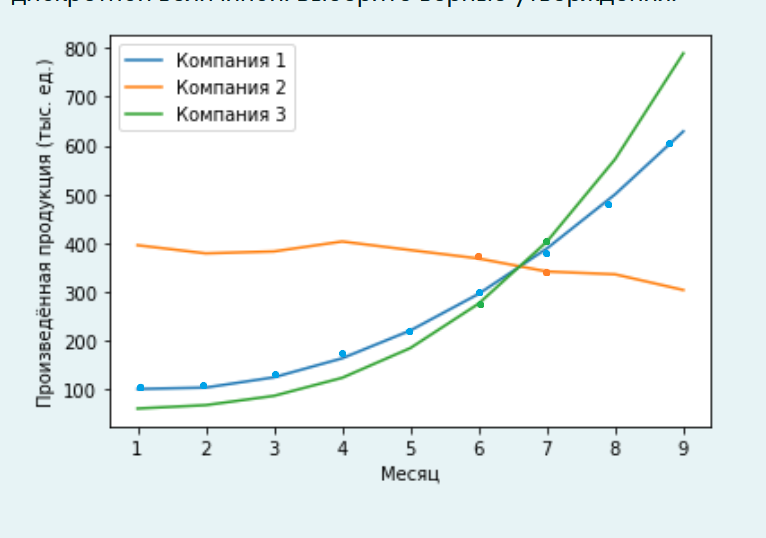

## 1. Вопросы по диаграмме рассеивания

> Ниже приведена диаграмма рассеяния для переменных "масса цветка в граммах" и "длина ростка в сантиметрах". Выберите верное утверждение.

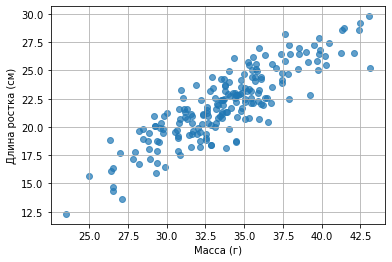

Варианты ответа (нужно было выбрать один):

> Большинство экземпляров имеют массу от 27 до 40 граммов

> Не существует экземпляра с массой более 35 граммов и длиной ростка более 20 см

> Лишь один экземпляр имеет длину ростка менее 15 см

> Ни один экземпляр не имеет длины ростка более 28 см


Здесь важно, что масса рисуется по горизонтали, а длина ростка по вертикали. 
    Если нужно понять что-то про **массу**, то находим нужное значение **на горизонтальной оси ($X$)**, а когда нашли, проводим мысленно вертикальную перпендикулярную линию.
    На этой линии будут точки с одинаковой массой.
    
И наоборот, если нужно понять про длиную ростка, то находим нужное значение на **на вертикальной оси ($Y$)**, а когда нашли, проводим мысленно горизонтальную перпендикулярную линию.
    На этой линии будут точки с одинаковой длиной ростка.
    
Ниже, проверяем первый ответ:

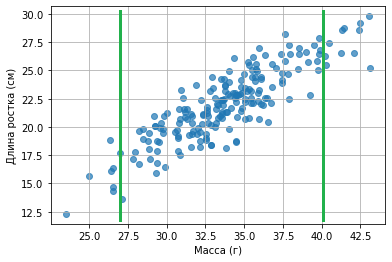

Первый ответ, похоже, верен, большинство цветов и правда массой от 27 до 40.

Ниже проверяем второй ответ, где два условия:

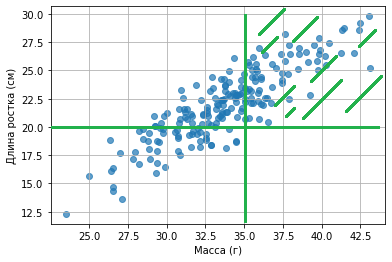

- масса больше 35 (это точки справа от вертикальной линии)
- длина больше 20 (это точки сверху от горизонтальной линии)

Точек в области сверху и справа от линий вообще-то много, так что это неверный вариант ответа.

✔ **Большинство экземпляров имеют массу от 27 до 40 граммов**

## 3. С каким типом графика сочетать *линию регрессии*

Это график с точками, диаграмма рассеяния.
    Линия регрессии, или линия тренда, будет отражать связь значений по горизонтали и вертикали, тренд.
    **См. лекцию**
    
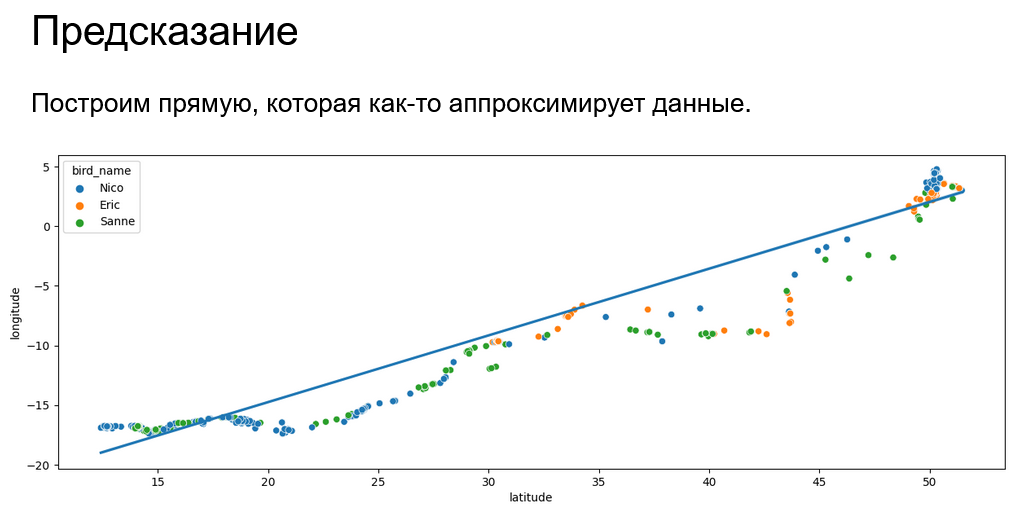

## 4. Каковы данные, судя по их среднему, медиане и стандартному отклонению?

> Исследователь Иван собрал данные по численности трёх популяций кальмаров в некотором регионе за 12 лет. Эти данные приведены в таблице ниже.

|                      |Популяция 1 |Популяция 2|Популяция 3|
|----------------------|------------|-----------|-----------|
|Среднее               |2002        |5401       |3048       |
|Медиана               |2005        |3001       |4000       |
|Стандартное отклонение|30          |402        |350        |

Варианты ответа (выбрать один):

> В какой-то год количество кальмаров из популяции 2 было аномально высоким

> Наибольший разброс имеют наблюдения из популяции 1 

> В какой-то год количество кальмаров из популяции 3 было аномально высоким

> Если рассматривать промежуток в 9 лет, то среднее и медиана численности кальмаров в популяции 1 обязательно совпадут


см. лекцию, слайды про среднее, стандартное отклонение и медиану, пример про **выбросы**, и как они влияют на среднее (сильно) и как на медиану (почти никак).

✔ **В какой-то год количество кальмаров из популяции 2 было аномально высоким**


## 5. Типы переменных

> Аналитик Сергей занимается исследованием флоры городских парков. Определите тип переменных, с которыми он работает.

Переменные: 

> Цвет, в который покрашены фонари в парке &mdash; номинальная

> Количество деревьев

> Наличие в парке водоёма

> Площадь парка

> Категория качества воды в фонтанах парка

См. лекцию!


<details>
    <summary> Ответ </summary>
    ✔ <b>номинальная, дискретная, бинарная, непрерывная, ранговая</b>
</details>

# Расчёты в numpy. Стандартное отклонение


Посчитали с помощью
    `numpy` ([тетрадка 01](https://github.com/tbkazakova/DataAnalysis_2023/blob/main/datan/230404_numpy_pandas.ipynb))
**стандартное отклонение** поэтапно:

Стандартное отклонение: $\sqrt{ \frac{\Sigma{ (\bar{x} - x_i)^2  }}{ n } }$ (средняя сумма *квадратов* отклонений каждого конкретного значения $x_i$ от среднего $\bar{x}$, и из неё взять квадратный корень)

$\text{deviation} = (\bar{x} - x_i)^2 $ (квадраты отклонений, массив)  
$\text{avg_dev} =  \frac{\Sigma{ (\bar{x} - x_i)^2  }}{ n }$ (средний квадрат отклонений / среднеквадратичное отклонение, одно число).  



In [2]:
import numpy as np

# длины клювов пингвинов в мм, по лекции 
bills = np.array([52.8, 45.1, 36.2, 43.8, 39.3, 46.2, 34.5, 41.4, 33.5, 45.8])
avg = bills.mean()  # средняя длина

deviation = (bills - avg) ** 2  # квадраты отклонений
print(deviation, end="\n\n")

# среднеквадратичное отклонение (на лекции вроде не называли как-то отдельно)
avg_dev = deviation.mean()  # deviation.sum() / len(deviation)   
print(avg_dev)

# наконец, итог, стандартное отклонение
print(np.sqrt(avg_dev))



[119.6836  10.4976  32.0356   3.7636   6.5536  18.8356  54.1696   0.2116
  69.8896  15.5236]

33.11639999999999
5.754685047854486


**Возведение в квадрат нужно, чтобы избавиться от возможных минусов, отрицательных чисел**
    (ведь какие-то значения могут быть больше среднего, а какие-то меньше, и что бы мы ни вычитали:
    среднее из значений или значения из среднего, может возникнуть минус).

От минуса также избавляет модуль.
    Это верно, но всё же прижилось стандартное отклонение, с квадратом, используется оно. 


❓ То же самое вышло бы, если считать средний модуль отклонений, а не корень среднего квадрата отклонений?

✔ **Нет, не то же самое!**

Средний модуль: $\frac{\Sigma{ |\bar{x} - x_i|  }}{ n } $

И число будет другое:


In [3]:
abs_dev = np.abs(bills - avg)  # np.abs - модуль (absolute value)

print(abs_dev.mean())

4.88


# пример, когда совпадают среднее и медиана

In [10]:
nums = np.array([1, 3, 5, 8, 8])

In [14]:
# среднее
nums.mean()

5.0

In [15]:
# медиана

np.quantile(nums, 0.5)

5.0